In [1]:
import math
import scipy
import numpy as np
import numpy.random as npr
from numpy.fft import fft
from scipy.integrate import quad
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm

log-normal price

$S(T) = S_0e^{\mu T + \sigma \sqrt{T}Z}$

risk-neutral model price

$S(T) = S_0e^{(r - \sigma^2/2)T + \sigma \sqrt{T}Z}$

In [2]:
S0 = 100 # initial value
S1 = 200
r = 0.05 # constant short rate
sigma = 0.2 # constant volatility
T = 1.0 # in years
I = 10000 # number of random draws
K = 100
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))

In [3]:
ST1.sort()
print(ST1)

[  52.30075574   53.36482108   53.82187116 ...,  198.41676965  200.95438487
  253.00386192]


In [4]:
def D1(Sp, t):
    return (np.log(Sp / K) + (r + sigma ** 2 / 2) * t) / (sigma * np.sqrt(t)) 

In [5]:
def D2(sp, t):
    return d1(Sp, t) - sigma * np.sqrt(t)

In [6]:
def f(x):
    return norm.pdf(x)

In [7]:
def F(x):
    return stats.norm.cdf(x)

In [8]:
D1C = F(D1(ST1, 0.8))
D2C = F(D1(ST1, 0.5))
D3C = F(D1(ST1, 0.2))

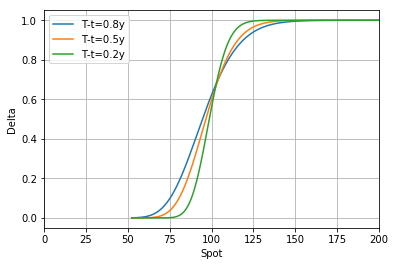

In [9]:
plt.plot(ST1, D1C)
plt.plot(ST1, D2C)
plt.plot(ST1, D3C)
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Delta')
plt.xlim([0, 200])
plt.grid(True)
plt.show()

In [10]:
G1 = f(D1(ST1, 0.8)) / (ST1 * sigma * np.sqrt(0.8))
G2 = f(D1(ST1, 0.5)) / (ST1 * sigma * np.sqrt(0.5))
G3 = f(D1(ST1, 0.2)) / (ST1 * sigma * np.sqrt(0.2))

In [11]:
Smax1 = K * math.exp(-(r + 3 * sigma ** 2 / 2) * 0.8)
MAX1 = f(D1(Smax1, 0.8)) / (Smax1 * sigma * np.sqrt(0.8))
Smax2 = K * math.exp(-(r + 3 * sigma ** 2 / 2) * 0.5)
MAX2 = f(D1(Smax2, 0.5)) / (Smax2 * sigma * np.sqrt(0.5))
Smax3 = K * math.exp(-(r + 3 * sigma ** 2 / 2) * 0.2)
MAX3 = f(D1(Smax3, 0.2)) / (Smax3 * sigma * np.sqrt(0.2))

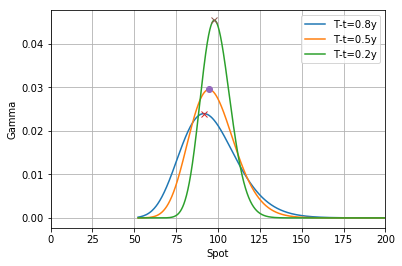

In [12]:
plt.plot(ST1, G1)
plt.plot(ST1, G2)
plt.plot(ST1, G3)
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Gamma')
plt.xlim([0, 200])
plt.plot(Smax1, MAX1, 'x')
plt.plot(Smax2, MAX2, 'o')
plt.plot(Smax3, MAX3, 'x')
plt.plot()
plt.grid(True)
plt.show()

In [13]:
V1 = ST1 * f(D1(ST1, 0.8)) * np.sqrt(0.8)
V2 = ST1 * f(D1(ST1, 0.5)) * np.sqrt(0.5)
V3 = ST1 * f(D1(ST1, 0.2)) * np.sqrt(0.2)

In [14]:
Smax1v = K * math.exp((sigma ** 2 / 2 - r) * 0.8)
MAX1v = Smax1v * f(D1(Smax1v, 0.8)) * np.sqrt(0.8)
Smax2v = K * math.exp((sigma ** 2 / 2 - r) * 0.5)
MAX2v = Smax2v * f(D1(Smax2v, 0.5)) * np.sqrt(0.5)
Smax3v = K * math.exp((sigma ** 2 / 2 - r) * 0.2)
MAX3v = Smax3v * f(D1(Smax3v, 0.2)) * np.sqrt(0.2)

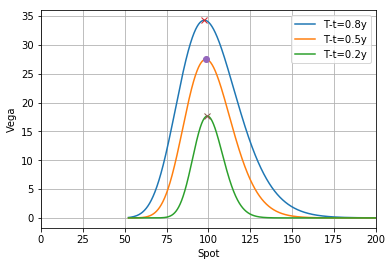

In [15]:
plt.plot(ST1, V1)
plt.plot(ST1, V2)
plt.plot(ST1, V3)
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Vega')
plt.xlim([0, 200])
plt.plot(Smax1v, MAX1v, 'x')
plt.plot(Smax2v, MAX2v, 'o')
plt.plot(Smax3v, MAX3v, 'x')
plt.grid(True)
plt.show()

In [20]:
#S = scipy.linspace(M)
K = 100
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(I))

In [21]:
print(S)

[[ 100.          100.          100.         ...,  100.          100.          100.        ]
 [  99.90464097   98.342354    105.31806933 ...,  101.29088323
   103.14726826   97.14515207]
 [  98.4969289    95.71799749  104.33954849 ...,  101.27202638
   106.95497903   95.99137743]
 ..., 
 [ 113.00998368   88.83005814  119.15959489 ...,   80.80940063
   121.11911841   85.65477771]
 [ 110.16729157   91.07769017  127.65476636 ...,   83.89234297
   123.38932629   81.88158363]
 [ 111.98783417   99.95519744  125.32823049 ...,   83.43929154
   116.59147575   79.35045491]]


In [26]:
s = np.sort(S)
print(s[:100])

[[ 100.          100.          100.         ...,  100.          100.          100.        ]
 [  88.87321777   90.42624995   90.66023247 ...,  111.04174123  111.178536
   111.46290315]
 [  85.85734337   86.58898488   86.89804608 ...,  114.77775163
   115.27639835  115.47808993]
 ..., 
 [  51.98727021   53.19916478   53.54096894 ...,  192.94033315
   193.17077835  203.30064231]
 [  52.45708228   52.95386906   54.04904174 ...,  194.64510782
   201.50541679  202.48989408]
 [  51.91198492   52.71652771   53.00444623 ...,  199.52057891
   201.21012844  208.06702314]]


In [27]:
D1C_ = F(D1(S, 0.8))
D2C_ = F(D1(S, 0.5))
D3C_ = F(D1(S, 0.2))

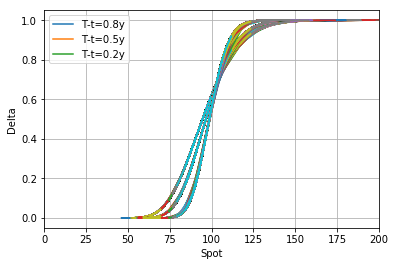

In [28]:
plt.plot(S, D1C_)
plt.plot(S, D2C_)
plt.plot(S, D3C_)
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Delta')
plt.xlim([0, 200])
#plt.ylim([-0.1, 1.1])
plt.grid(True)
plt.show()

In [29]:
D1P_ = F(D1(S, 0.8)) - 1
D2P_ = F(D1(S, 0.5)) - 1
D3P_ = F(D1(S, 0.2)) - 1

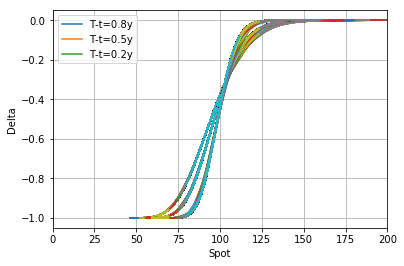

In [30]:
plt.plot(S, D1P_)
plt.plot(S, D2P_)
plt.plot(S, D3P_)
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Delta')
plt.xlim([0, 200])
#plt.ylim([-0.1, 1.1])
plt.grid(True)
plt.show()

In [93]:
G1_ = f(D1(S, 0.8)) / (S * sigma * np.sqrt(0.8))
G2_ = f(D1(S, 0.5)) / (S * sigma * np.sqrt(0.5))
G3_ = f(D1(S, 0.2)) / (S * sigma * np.sqrt(0.2))

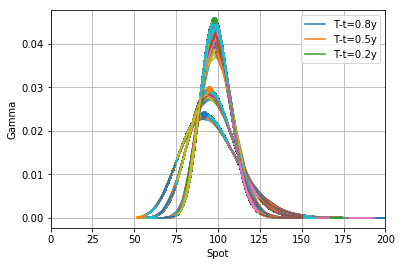

In [101]:
plt.plot(S, G1_)
plt.plot(S, G2_)
plt.plot(S, G3_)
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Gamma')
plt.xlim([0, 200])
plt.plot(Smax1, MAX1, 'o')
plt.plot(Smax2, MAX2, 'o')
plt.plot(Smax3, MAX3, 'o')
plt.plot()
plt.grid(True)
plt.show()

In [95]:
V1_ = S * f(D1(S, 0.8)) * np.sqrt(0.8)
V2_ = S * f(D1(S, 0.5)) * np.sqrt(0.5)
V3_ = S * f(D1(S, 0.2)) * np.sqrt(0.2)

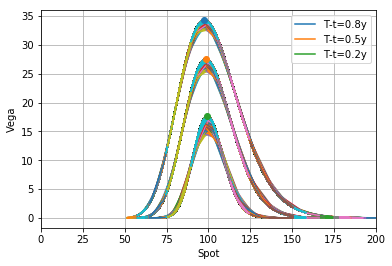

In [104]:
plt.plot(S, V1_)
plt.plot(S, V2_)
plt.plot(S, V3_)
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Vega')
plt.xlim([0, 200])
plt.grid(True)
#plt.annotate('max', xy=(100, 28), xytext=(120, 30),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )
plt.plot(Smax1v, MAX1v, 'o')
plt.plot(Smax2v, MAX2v, 'o')
plt.plot(Smax3v, MAX3v, 'o')
plt.show()